In [5]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import requests

In [2]:
base_url = 'https://python.zach.lol'

In [3]:
response = requests.get(base_url + '/documentation')

In [4]:
response = requests.get('https://python.zach.lol/api/v1/items')
data = response.json()
data.keys()

dict_keys(['payload', 'status'])

In [5]:
items = pd.DataFrame(data['payload']['items'])

In [6]:
data['payload']['items']

[{'item_brand': 'Riceland',
  'item_id': 1,
  'item_name': 'Riceland American Jazmine Rice',
  'item_price': 0.84,
  'item_upc12': '35200264013',
  'item_upc14': '35200264013'},
 {'item_brand': 'Caress',
  'item_id': 2,
  'item_name': 'Caress Velvet Bliss Ultra Silkening Beauty Bar - 6 Ct',
  'item_price': 6.44,
  'item_upc12': '11111065925',
  'item_upc14': '11111065925'},
 {'item_brand': 'Earths Best',
  'item_id': 3,
  'item_name': 'Earths Best Organic Fruit Yogurt Smoothie Mixed Berry',
  'item_price': 2.43,
  'item_upc12': '23923330139',
  'item_upc14': '23923330139'},
 {'item_brand': 'Boars Head',
  'item_id': 4,
  'item_name': 'Boars Head Sliced White American Cheese - 120 Ct',
  'item_price': 3.14,
  'item_upc12': '208528800007',
  'item_upc14': '208528800007'},
 {'item_brand': 'Back To Nature',
  'item_id': 5,
  'item_name': 'Back To Nature Gluten Free White Cheddar Rice Thin Crackers',
  'item_price': 2.61,
  'item_upc12': '759283100036',
  'item_upc14': '759283100036'},
 {'i

In [7]:
print('max_page: %s' % data['payload']['max_page'])

max_page: 3


In [8]:
response = requests.get(base_url + data['payload']['next_page'])
data = response.json()

items = pd.concat([items, pd.DataFrame(data['payload']['items'])]).reset_index()

In [9]:
response = requests.get(base_url + data['payload']['next_page'])
data = response.json()

print('next_page: %s' % data['payload']['next_page'])

items = pd.concat([items, pd.DataFrame(data['payload']['items'])]).reset_index()

next_page: None


In [10]:
items

,level_0,index,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,1.0,Caress,2,Caress Velvet Bliss Ultra Silkening Beauty Bar...,6.44,11111065925,11111065925
2,2,2.0,Earths Best,3,Earths Best Organic Fruit Yogurt Smoothie Mixe...,2.43,23923330139,23923330139
3,3,3.0,Boars Head,4,Boars Head Sliced White American Cheese - 120 Ct,3.14,208528800007,208528800007
4,4,4.0,Back To Nature,5,Back To Nature Gluten Free White Cheddar Rice ...,2.61,759283100036,759283100036
5,5,5.0,Sally Hansen,6,Sally Hansen Nail Color Magnetic 903 Silver El...,6.93,74170388732,74170388732
6,6,6.0,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004
7,7,7.0,Lea & Perrins,8,Lea & Perrins Marinade In-a-bag Cracked Pepper...,1.68,51600080015,51600080015
8,8,8.0,Van De Kamps,9,Van De Kamps Fillets Beer Battered - 10 Ct,1.79,19600923015,19600923015
9,9,9.0,Ahold,10,Ahold Cocoa Almonds,3.17,688267141676,688267141676


In [11]:
response = requests.get('https://python.zach.lol/api/v1/stores')
data = response.json()
data.keys()

dict_keys(['payload', 'status'])

In [12]:
stores = pd.DataFrame(data['payload']['stores'])

In [13]:
data['payload']['next_page']

In [14]:
response = requests.get('https://python.zach.lol/api/v1/sales')
data = response.json()
data.keys()

dict_keys(['payload', 'status'])

In [15]:
sales = []
url = "https://python.zach.lol/api/v1/sales"

stores_list = []
response = requests.get(url)
data = response.json()
n = data['payload']['max_page']


for i in range(1, n+1):
    new_url = url + '?page=' + str(i)
    response = requests.get(new_url)
    data = response.json()
    page_items = data['payload']['sales']
    sales += page_items

sales = pd.DataFrame(sales)

In [7]:
sales = acquire.get_sales(cached = True)

In [11]:
sales.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'], inplace = True)

In [13]:
sales.to_csv('sales.csv')

In [15]:
sales = pd.read_csv('sales.csv', index_col = 0)
sales

,item,sale_amount,sale_date,sale_id,store
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1
...,...,...,...,...,...
912995,50,63.0,"Wed, 27 Dec 2017 00:00:00 GMT",912996,10
912996,50,59.0,"Thu, 28 Dec 2017 00:00:00 GMT",912997,10
912997,50,74.0,"Fri, 29 Dec 2017 00:00:00 GMT",912998,10
912998,50,62.0,"Sat, 30 Dec 2017 00:00:00 GMT",912999,10


In [1]:
import acquire

In [67]:
acquire.store_them(sales, stores, items)

In [2]:
df = acquire.complete_data(cached = False)

In [3]:
df

,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,50,63.0,"Wed, 27 Dec 2017 00:00:00 GMT",912996,10,8503 NW Military Hwy,San Antonio,TX,78231,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221
912996,50,59.0,"Thu, 28 Dec 2017 00:00:00 GMT",912997,10,8503 NW Military Hwy,San Antonio,TX,78231,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221
912997,50,74.0,"Fri, 29 Dec 2017 00:00:00 GMT",912998,10,8503 NW Military Hwy,San Antonio,TX,78231,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221
912998,50,62.0,"Sat, 30 Dec 2017 00:00:00 GMT",912999,10,8503 NW Military Hwy,San Antonio,TX,78231,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221


In [6]:
df['sale_date'] = pd.to_datetime(df.sale_date)

<AxesSubplot:>

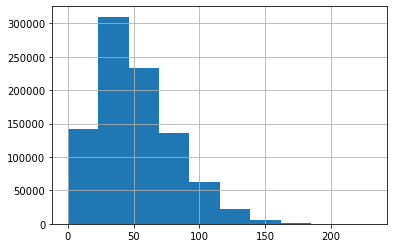

In [7]:
df.sale_amount.hist()

<AxesSubplot:>

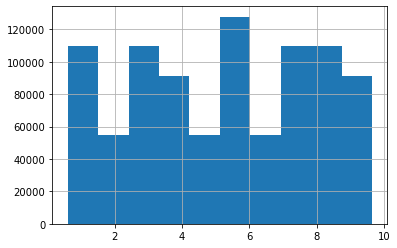

In [8]:
df.item_price.hist()

In [9]:
df = df.set_index('sale_date').sort_index()

In [10]:
df['month'] = df.index.month

In [11]:
df['day_of_week'] = df.index.day_name()

In [13]:
df['sales_total'] = df.sale_amount * df.item_price

In [14]:
df

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,294.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 00:00:00+00:00,34,21.0,619014,9,735 SW Military Dr,San Antonio,TX,78221,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,12,Sunday,87.57
2017-12-31 00:00:00+00:00,34,32.0,620840,10,8503 NW Military Hwy,San Antonio,TX,78231,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,12,Sunday,133.44
2017-12-31 00:00:00+00:00,35,55.0,622666,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Natures Way,Natures Way Forskohlii - 60 Ct,5.19,33674100066,33674100066,12,Sunday,285.45
